In [1]:
import pandas as pd

# Load the dataset
file_path = "last_v_of_data.csv"
df = pd.read_csv(file_path)

# Display basic info and summary statistics
df_info = df.info()
df_summary = df.describe()

df_info, df_summary



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   price                                     8401 non-null   int64 
 1   country                                   8401 non-null   object
 2   description                               8401 non-null   object
 3   rating                                    8401 non-null   object
 4   reviews                                   8401 non-null   object
 5   Region                                    8401 non-null   object
 6   skills_list                               8401 non-null   object
 7   skills_count                              8401 non-null   int64 
 8   level                                     8401 non-null   object
 9   categories                                8401 non-null   object
 10  skills_list_standardization               8401 n

(None,
              price  skills_count  description_Length  \
 count  8401.000000   8401.000000         8401.000000   
 mean     24.951434      3.915010          885.026068   
 std      55.126634      1.433499          681.041282   
 min       0.000000      1.000000            2.000000   
 25%      10.000000      3.000000          356.000000   
 50%      15.000000      4.000000          721.000000   
 75%      30.000000      5.000000         1196.000000   
 max    1000.000000      8.000000         3029.000000   
 
        Extracted_Skills_from_description_number  
 count                               8401.000000  
 mean                                 111.413641  
 std                                   97.559131  
 min                                    0.000000  
 25%                                   38.000000  
 50%                                   87.000000  
 75%                                  159.000000  
 max                                  749.000000  )

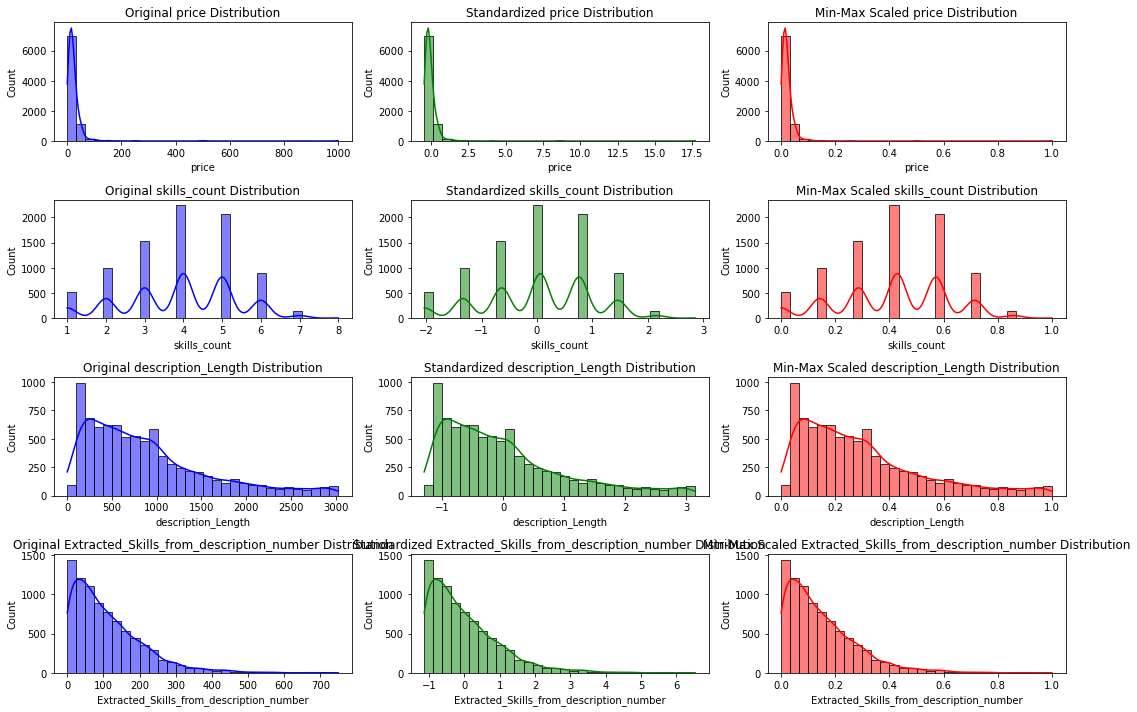

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
numerical_cols = ["price", "skills_count", "description_Length", "Extracted_Skills_from_description_number"]

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply scaling
df_standardized = df.copy()
df_minmax_scaled = df.copy()
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])
df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

# Plot original vs. scaled distributions
fig, axes = plt.subplots(len(numerical_cols), 3, figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, ax=axes[i, 0], kde=True, color="blue")
    axes[i, 0].set_title(f"Original {col} Distribution")

    sns.histplot(df_standardized[col], bins=30, ax=axes[i, 1], kde=True, color="green")
    axes[i, 1].set_title(f"Standardized {col} Distribution")

    sns.histplot(df_minmax_scaled[col], bins=30, ax=axes[i, 2], kde=True, color="red")
    axes[i, 2].set_title(f"Min-Max Scaled {col} Distribution")

plt.tight_layout()
plt.show()

In [2]:
df.head(10)

,price,country,description,rating,reviews,Region,skills_list,skills_count,level,categories,skills_list_standardization,description_Length,Extracted_Skills_from_description,Extracted_Skills_from_description_list,Extracted_Skills_from_description_number,rating_category,reviews_category
0,18,India,OweBest is a dynamic and rapidly expanding IT ...,4.9,490,Asia,"['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...",3,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'My', 'Software', 'Archi...",994,"business, expertise, Web, Design, Development,...","[' Web', ' Development', ' quality', ' experti...",221,high,High
1,15,India,"7000 ⭐⭐⭐⭐⭐+ Reviews, 2000+ satisfied clients G...",4.9,7018,Asia,"['SEOLink', 'BuildingInternet', 'MarketingAdve...",4,5,['Marketing'],"['Link', 'Building', 'Internet', 'Marketing', ...",2936,"clients, Business, Expertise, Google, Marketin...","[' Data', ' Experience', ' Years', ' social', ...",420,high,Very High
2,45,Pakistan,TAFSOL TECHNOLOGIES Group!! Aiming to deliver ...,5.0,195,Asia,"['PHPWebsite', 'DesignHTMLSoftware', 'Architec...",4,5,"['Graphic Design', 'Programming', 'Web Develop...","['Website', 'Design', 'Software', 'Architectur...",2663,"Projects, Digital, SERVICES, Mobile, App, Deve...","[' Experience', ' experience', ' Years', ' web...",464,high,High
3,30,Bangladesh,eTranslators offers over a DECADE of experienc...,4.9,3633,Asia,"['TranslationEnglish (US)', 'TranslatorEnglish...",4,5,['Translation'],"['Translation', 'English', 'Translator', 'Engl...",1296,"experience, professional, DIGITAL, CONTENT, DE...","[' quality', ' MANAGEMENT', ' services', ' Hig...",158,high,Very High
4,45,India,The Grace Of Almighty God ____________________...,5.0,558,Asia,"['Internet', 'MarketingFacebook', 'MarketingSo...",5,3,['Other'],"['Internet', 'Marketing', 'Facebook', 'Marketi...",1508,"Marketing, Google, services, Services, Google,...","[' Web', ' business', ' services', ' Business'...",186,high,Very High
5,30,India,I'm a graphic designer with more than 9 years ...,5.0,2679,Asia,"['Graphic', 'DesignLogo', 'DesignPhotoshopIllu...",4,5,['Graphic Design'],"['Graphic', 'Design', 'Logo', 'Design', 'Photo...",673,"graphic, designer, years, logo, design, experi...","[' logo', ' Logo', ' clients', ' Digital', ' e...",168,high,Very High
6,40,India,"- Asp.Net, MVC | c# | .Net Framework - .Net Co...",5.0,709,Asia,"['jQueryJSONReact.jsC#', 'Programming.NET']",2,4,['Other'],"['j', 'Query', 'React', 'js', 'Programming']",1269,"Web, Social, Wordpress, Wordpress, PHP, React,...","[' Web', ' Development', ' Data', ' JS', ' usi...",161,high,Very High
7,60,India,"Hello, I am Full Time Expert Techno-Functional...",5.0,1029,Asia,"['ExcelVisual', 'BasicWeb', 'ScrapingData', 'E...",5,4,"['Finance', 'Web Development']","['Excel', 'Visual', 'Basic', 'Web', 'Scraping'...",747,"Time, Expert, Experience, Expert, Web, applica...","[' Web', ' expertise', ' Experience', 'Time', ...",62,high,Very High
8,35,India,"Hello! My name is Hitesh, An award-winning age...",5.0,3307,Asia,"['Graphic', 'DesignLogo', 'DesignPhotoshopBroc...",5,5,['Graphic Design'],"['Graphic', 'Design', 'Logo', 'Design', 'Photo...",804,"website, graphic, business, work, professional...","[' Logo', ' Development', ' business', ' Proje...",150,high,Very High
9,95,Croatia,BrightDock helps business leaders develop succ...,5.0,223,Europe,"['Graphic', 'DesignWebsite', 'DesignPHPHTMLWor...",3,5,"['Graphic Design', 'Web Development']","['Graphic', 'Design', 'Website', 'Design', 'Wo...",966,"business, digital, design, Mobile, app, React,...","[' Digital', ' business', ' digital', ' app', ...",167,high,High


In [3]:
# Count NaN values in each numerical column
numerical_cols = ["price", "skills_count", "description_Length", "Extracted_Skills_from_description_number"]
nan_counts = df[numerical_cols].isna().sum()

# Display the result
print(nan_counts)


price                                       0
skills_count                                0
description_Length                          0
Extracted_Skills_from_description_number    0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ["price", "skills_count", "description_Length", "Extracted_Skills_from_description_number"]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display first few rows of the scaled data
print(df_scaled.head())


      price     country                                        description  \
0 -0.126107       India  OweBest is a dynamic and rapidly expanding IT ...   
1 -0.180530       India  7000 ⭐⭐⭐⭐⭐+ Reviews, 2000+ satisfied clients G...   
2  0.363704    Pakistan  TAFSOL TECHNOLOGIES Group!! Aiming to deliver ...   
3  0.091587  Bangladesh  eTranslators offers over a DECADE of experienc...   
4  0.363704       India  The Grace Of Almighty God ____________________...   

  rating reviews Region                                        skills_list  \
0    4.9     490   Asia  ['PHPWebsite', 'DesignHTMLMySQLSoftware', 'Arc...   
1    4.9    7018   Asia  ['SEOLink', 'BuildingInternet', 'MarketingAdve...   
2    5.0     195   Asia  ['PHPWebsite', 'DesignHTMLSoftware', 'Architec...   
3    4.9    3633   Asia  ['TranslationEnglish (US)', 'TranslatorEnglish...   
4    5.0     558   Asia  ['Internet', 'MarketingFacebook', 'MarketingSo...   

   skills_count level                                         

In [5]:

report = df_scaled[numerical_cols].describe().T  # Transpose for better readability





print(report)


                                           count          mean      std  \
price                                     8401.0 -2.885575e-17  1.00006   
skills_count                              8401.0 -4.539875e-16  1.00006   
description_Length                        8401.0  4.191915e-16  1.00006   
Extracted_Skills_from_description_number  8401.0  1.860592e-16  1.00006   

                                               min       25%       50%  \
price                                    -0.452647 -0.271236 -0.180530   
skills_count                             -2.033614 -0.638343  0.059292   
description_Length                       -1.296659 -0.776836 -0.240860   
Extracted_Skills_from_description_number -1.142079 -0.752549 -0.250259   

                                               75%        max  
price                                     0.091587  17.688484  
skills_count                              0.756927   2.849834  
description_Length                        0.456643   3.148270

# Analysis of the Data
Numerical Columns: price, skills_count, description_Length, and Extracted_Skills_from_description_number.

Categorical Columns: Many non-numeric columns that won’t be scaled.

Distribution Observations:

price: High standard deviation and a large max value (1000), suggesting possible outliers.

description_Length: Skewed distribution with a high max value (3029).

Extracted_Skills_from_description_number: Wide range (0 to 749), likely skewed.

Best Scaling Method
Since most numerical features appear skewed and contain large outliers, Standardization (Z-score Normalization) is the better choice.

Standardization is less sensitive to outliers, ensuring a stable mean of 0 and variance of 1.



### **1️⃣ Price**  
- **Mean:** ~0 (Standardized)  
- **Standard Deviation:** ~1 (Standardized)  
- **Range:** -0.45 to 17.68  
- **IQR (25%-75%):** -0.27 to 0.09  
- **Observations:**  
  - The **maximum value (17.68)** is much higher than the upper quartile, indicating **potential outliers**.  
  - Most prices are concentrated around **-0.27 to 0.09**, suggesting that high-priced jobs are rare.  
  - If using models sensitive to outliers, we may need to investigate **robust scaling** or **log transformation**.  

---

### **2️⃣ Skills Count**  
- **Mean:** ~0  
- **Standard Deviation:** ~1  
- **Range:** -2.03 to 2.84  
- **IQR (25%-75%):** -0.63 to 0.75  
- **Observations:**  
  - The **skills count varies** significantly, meaning some jobs require very few skills while others demand a lot.  
  - While the majority of values fall within the **-0.63 to 0.75 range**, a **max of 2.84** suggests some jobs have much higher skill demands.  
  - The presence of **negative values** (due to standardization) doesn’t impact the analysis, but we may need to revert to the original scale for clearer insights.  

---

### **3️⃣ Description Length**  
- **Mean:** ~0  
- **Standard Deviation:** ~1  
- **Range:** -1.29 to 3.14  
- **IQR (25%-75%):** -0.77 to 0.45  
- **Observations:**  
  - Job descriptions mostly fall between **-0.77 and 0.45**, with a few significantly longer descriptions reaching **3.14**.  
  - The **minimum value (-1.29)** suggests that some job descriptions are very short.  
  - A right-skewed distribution may be present, as some postings are extremely detailed.  

---

### **4️⃣ Extracted Skills from Description Number**  
- **Mean:** ~0  
- **Standard Deviation:** ~1  
- **Range:** -1.14 to 6.53  
- **IQR (25%-75%):** -0.75 to 0.48  
- **Observations:**  
  - The **maximum value (6.53)** is much higher than the 75th percentile (0.48), showing **extreme outliers** in extracted skills.  
  - Most job descriptions contain **a moderate number of skills**, but some have an **unusually high skill extraction count**.  
  - A right-skewed distribution may be affecting statistical models, and techniques like **log transformation** might help.  

---

### **📌 Final Conclusions:**  
- All features are **standardized**, ensuring fair comparisons across models.  
- **Outliers are present** in multiple columns, especially in **Price** and **Extracted Skills**.  
- A potential **right-skewed distribution** exists in **Description Length** and **Extracted Skills**, which might require transformations.  
- Further analysis should consider **removing extreme outliers** or applying transformations depending on the modeling technique.  

